<a href="https://colab.research.google.com/github/loydvinup/Walmart_Time_Series_Forecast/blob/main/TimeSeriesCSPrO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
FullData=pd.read_csv("/content/Walmart DataSet.csv")

In [5]:
FullData.describe()
FullData['Store'] = FullData['Store'].astype(str)

In [6]:
FullData.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
FullData.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


array([[<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Holiday_Flag'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>]], dtype=object)

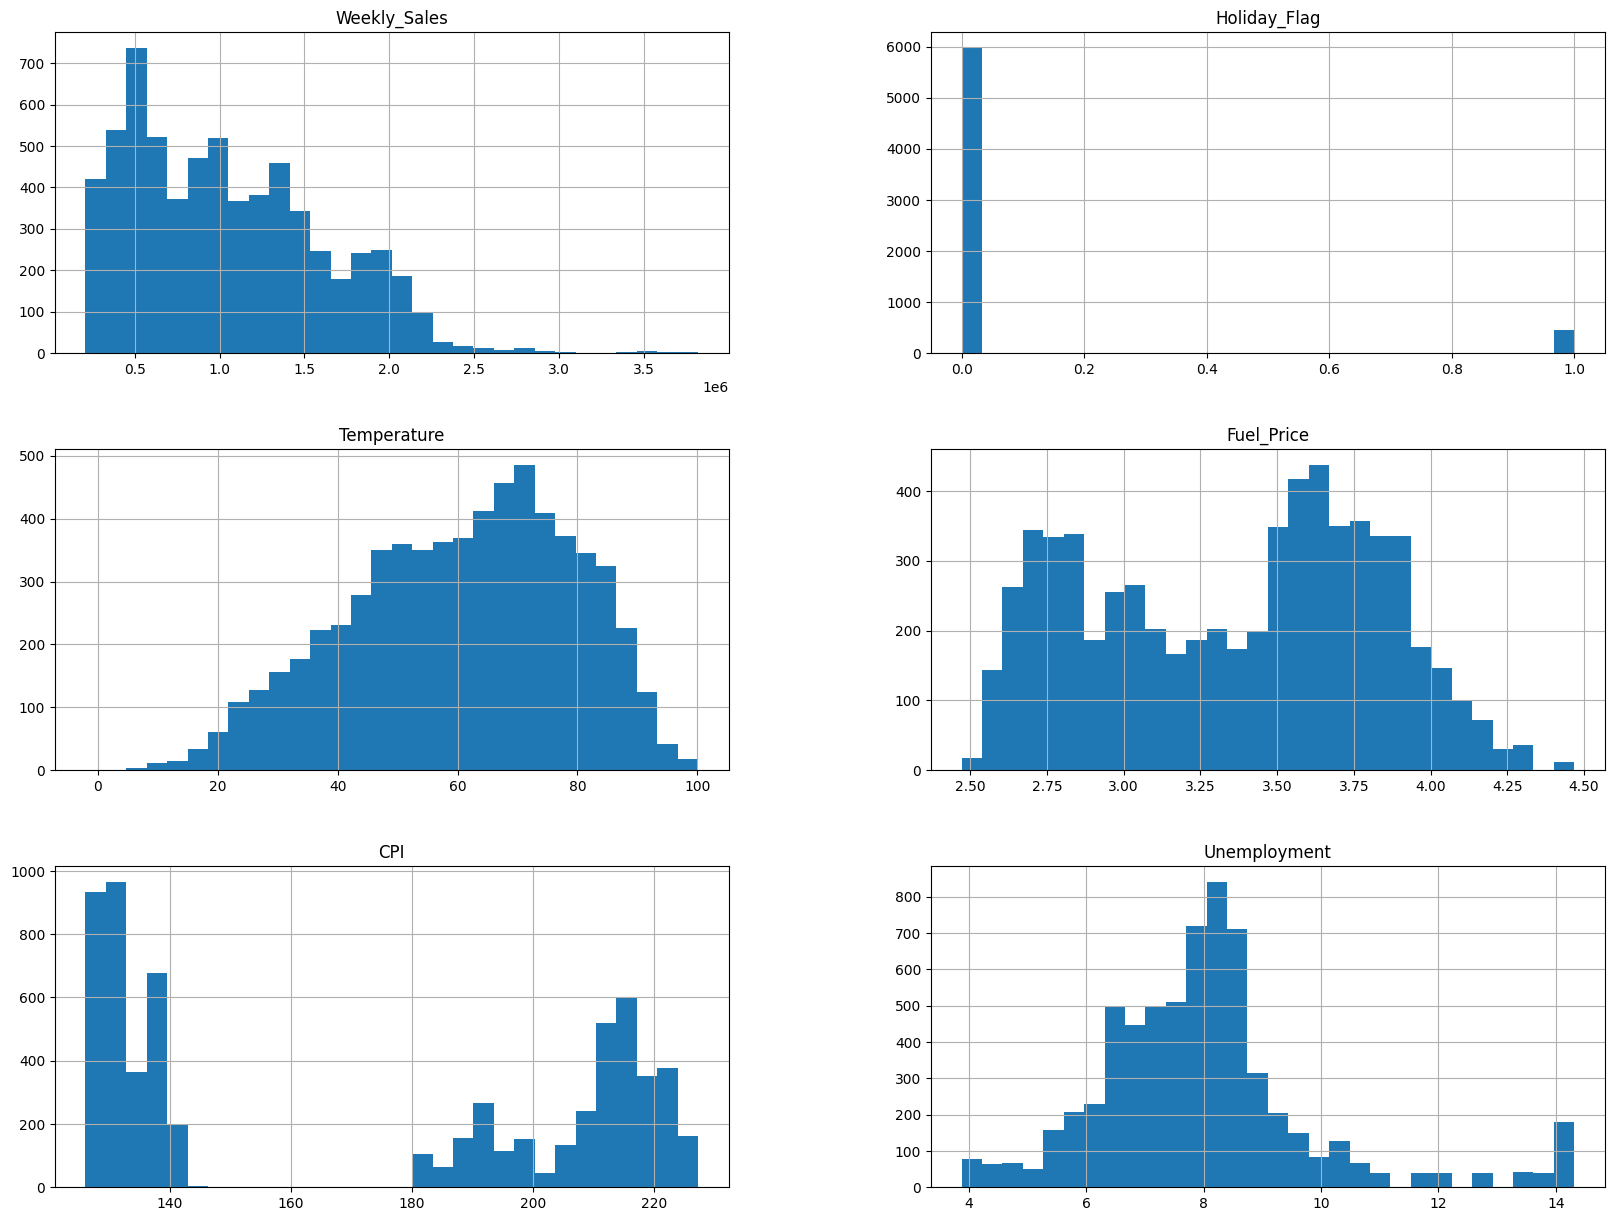

In [8]:
FullData.hist(bins=30, figsize=(20, 15))

<Axes: >

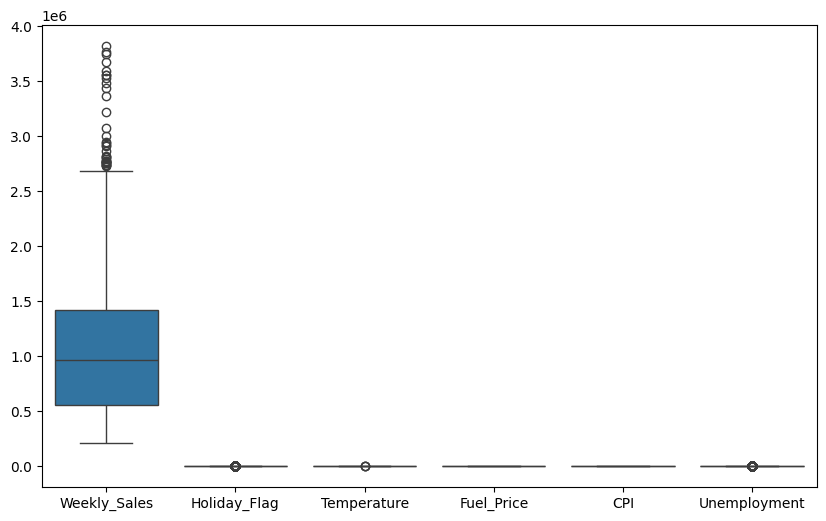

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=FullData)

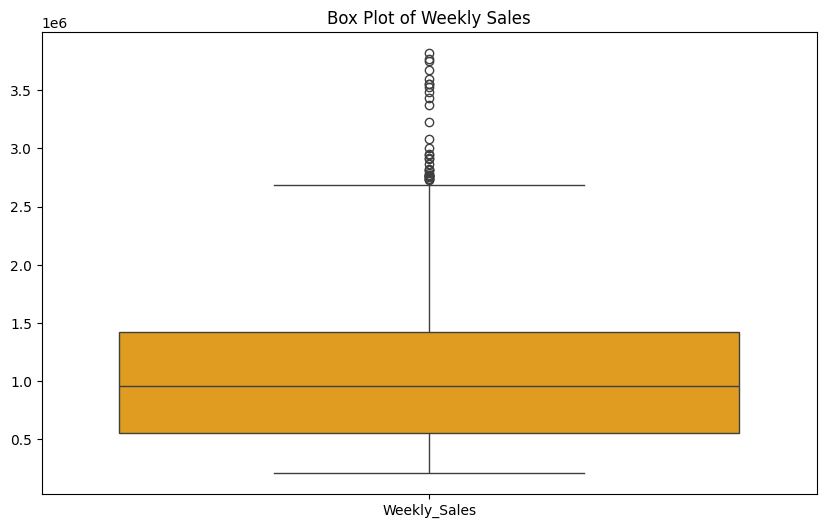

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=FullData[['Weekly_Sales']], color='orange')
plt.title('Box Plot of Weekly Sales')
plt.show()

In [11]:

Q1 = FullData['Weekly_Sales'].quantile(0.25)
Q3 = FullData['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = FullData[(FullData['Weekly_Sales'] < lower_bound) | (FullData['Weekly_Sales'] > upper_bound)]


outliers

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,23-12-2011,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,17-12-2010,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,16-12-2011,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,24-12-2010,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003


In [12]:
FullDataNoOutliers = FullData[(FullData['Weekly_Sales'] >= lower_bound) & (FullData['Weekly_Sales'] <= upper_bound)]


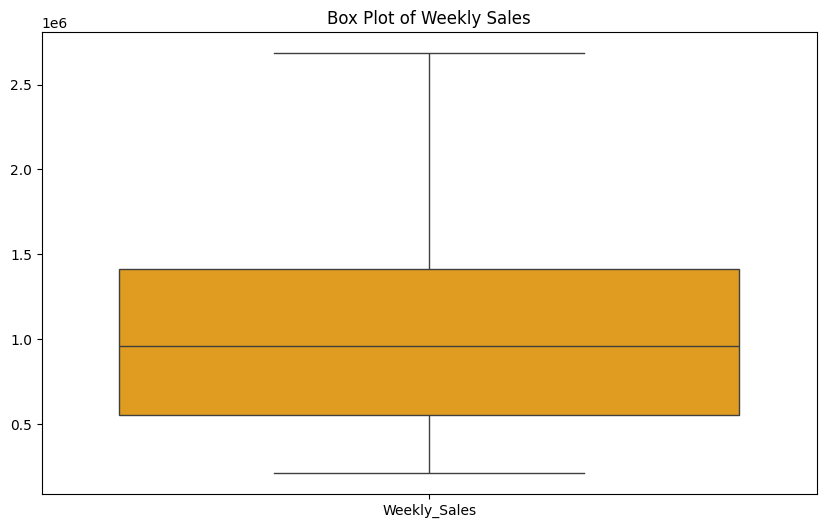

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=FullDataNoOutliers[['Weekly_Sales']], color='orange')
plt.title('Box Plot of Weekly Sales')
plt.show()

In [14]:
outliers.count()



# FullData=FullDataNoOutliers

,0
Store,34
Date,34
Weekly_Sales,34
Holiday_Flag,34
Temperature,34
Fuel_Price,34
CPI,34
Unemployment,34



## [**As There Were Only 34 outliers I kept Data Unchanged**    ]  


In [15]:
# a. Unemployment Rate vs Weekly Sales

correlation = FullData[['Weekly_Sales', 'Unemployment']].corr()
print(correlation)





              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.106176
Unemployment     -0.106176      1.000000


In [16]:
FullData

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


 negative correlation between Weekly_Sales and Unemployment):
Store
38   -0.785290
44   -0.780076
39   -0.384681
Name: Unemployment, dtype: float64


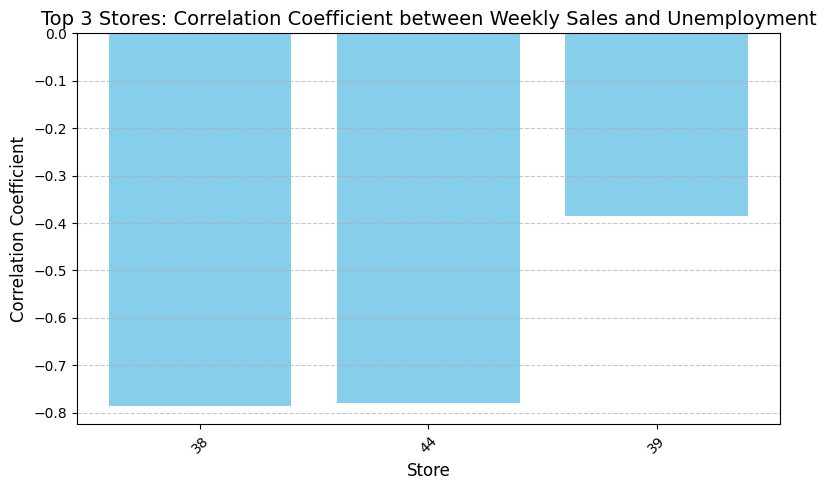

In [17]:

correlation_per_store = FullData.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1]


negative_correlation = correlation_per_store[correlation_per_store < 0]


ranked_stores=negative_correlation.groupby('Store').mean().sort_values().head(3)


print(" negative correlation between Weekly_Sales and Unemployment):")
print(ranked_stores)



plt.figure(figsize=(8, 5))
plt.bar(ranked_stores.index, ranked_stores.values, color='skyblue')
plt.xlabel('Store', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.title('Top 3 Stores: Correlation Coefficient between Weekly Sales and Unemployment', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Store 38 is negetively Affected   by Unemployment***

---



---

✅

In [18]:
# B)Seasonal Trend
FullData

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


<ipython-input-19-ced7c91ae09a>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  FullData['Weekly_Sales'].resample('M').sum().plot()


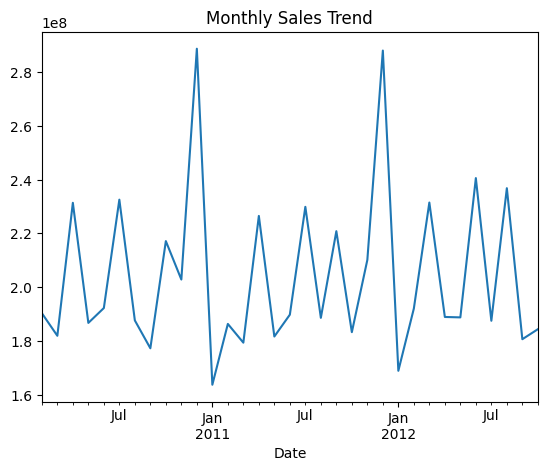

In [19]:

FullData['Date'] = pd.to_datetime(FullData['Date'],format='%d-%m-%Y')
FullData.set_index('Date', inplace=True)


FullData['Weekly_Sales'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.show()



## **November Have More Trend**

>  \

---



---



---





 ⏰:

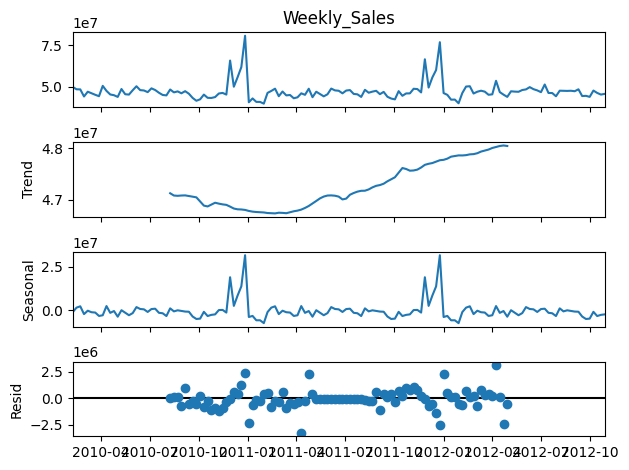

In [20]:
 # Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(FullData['Weekly_Sales'].resample('W').sum(), model='additive')
result.plot()
plt.show()


Holiday Season: November marks the beginning of the holiday shopping season in many countries.  

Festive Season: November is a festive month in India, with Diwali, the festival of lights, being one of the most significant festivals. Diwali is celebrated with great enthusiasm and involves extensive shopping for gifts, clothes, electronics, home appliances, and decorations. The festive season often extends throughout November, leading to increased consumer spending.


In [21]:
# "c.Temerature Vs Weekly Sales"

In [22]:
correlation_Tem = FullData[['Weekly_Sales', 'Temperature']].corr()
print(correlation_Tem)


              Weekly_Sales  Temperature
Weekly_Sales       1.00000     -0.06381
Temperature       -0.06381      1.00000


In [23]:
#  There Appears to be negative Correalation between Temparature and Weekly Sales

#  There Appears to be negative Correalation between Temparature and Weekly Sales

<function matplotlib.pyplot.show(close=None, block=None)>

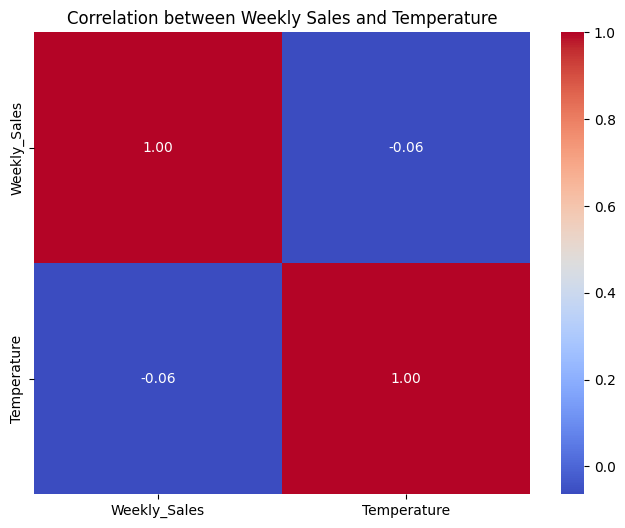

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_Tem, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Weekly Sales and Temperature')
plt.show

In [25]:
# d.CPI vs Sales

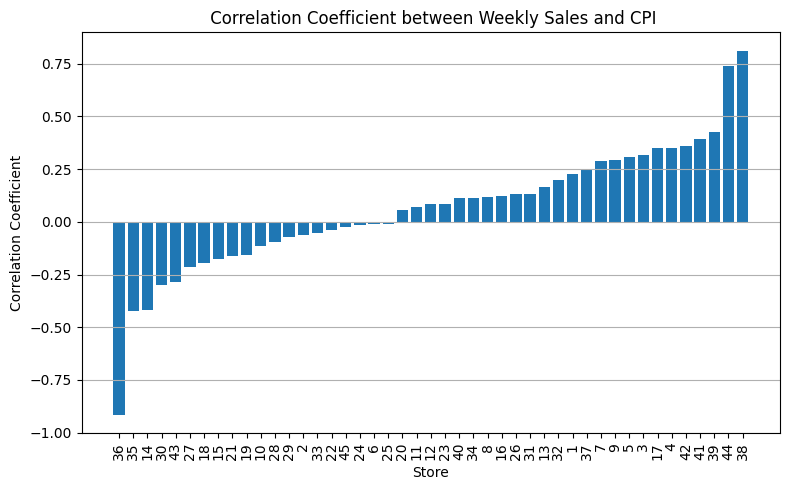

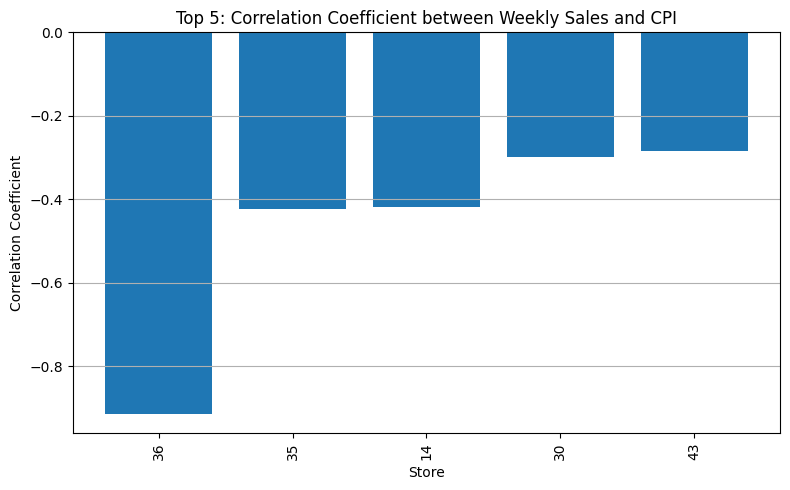

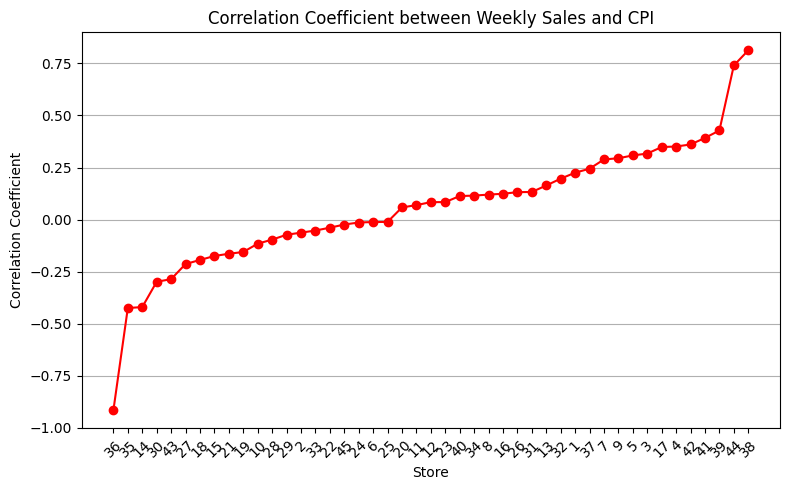

In [26]:

# StoreWise  Correlation between  Weekly_Sales and  CPI



correlation_per_store_CPI = FullData.groupby('Store')[['Weekly_Sales', 'CPI']].corr() .iloc[0::2, -1]



ranked_stores_CPI=correlation_per_store_CPI.groupby('Store').mean().sort_values()


ranked_stores_CPI5=correlation_per_store_CPI.groupby('Store').mean().sort_values().head(5)


plt.figure(figsize=(8, 5))
plt.bar(ranked_stores_CPI.index, ranked_stores_CPI.values)
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.title(' Correlation Coefficient between Weekly Sales and CPI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
plt.bar(ranked_stores_CPI5.index, ranked_stores_CPI5.values)
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.title('Top 5: Correlation Coefficient between Weekly Sales and CPI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




plt.figure(figsize=(8, 5))
plt.plot(ranked_stores_CPI.index, ranked_stores_CPI.values, marker='o', linestyle='-', color='red')
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient between Weekly Sales and CPI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [27]:
correlation_CPI = FullData[['Weekly_Sales', 'CPI']].corr()
print(correlation_CPI)

              Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.072634
CPI              -0.072634  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

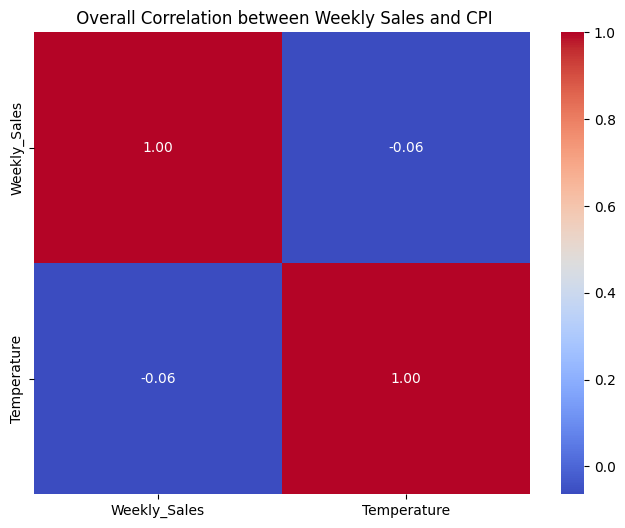

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_Tem, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Overall Correlation between Weekly Sales and CPI')
plt.show

# **There Appears Negligible Negative Correalation between Weekly Sales and Consumer Price Index**

---



---



In [29]:
# Top Performing Stores

In [30]:
# FullData.groupby('Store')['Weekly_Sales'].mean()

   Store  Average_Sales  Total_Sales  Percentage_Contribution  \
11     2     1925750.86  275382373.0                 4.087480   
4     13     2003619.81  286517633.0                 4.252760   
5     14     2020977.91  288999841.0                 4.289603   
33     4     2094712.45  299543881.0                 4.446108   
12    20     2107676.36  301397719.0                 4.473624   

   Percentage_Contribution_Fmt  
11                       4.09%  
4                        4.25%  
5                        4.29%  
33                       4.45%  
12                       4.47%  
   Store  Average_Sales  Total_Sales  Percentage_Contribution  \
26    33      259861.19   37160150.0                 0.551565   
38    44      302748.41   43293023.0                 0.642595   
40     5      318011.31   45475617.0                 0.674991   
29    36      373511.46   53412139.0                 0.792792   
31    38      385731.15   55159554.0                 0.818729   

   Percentage_Contri

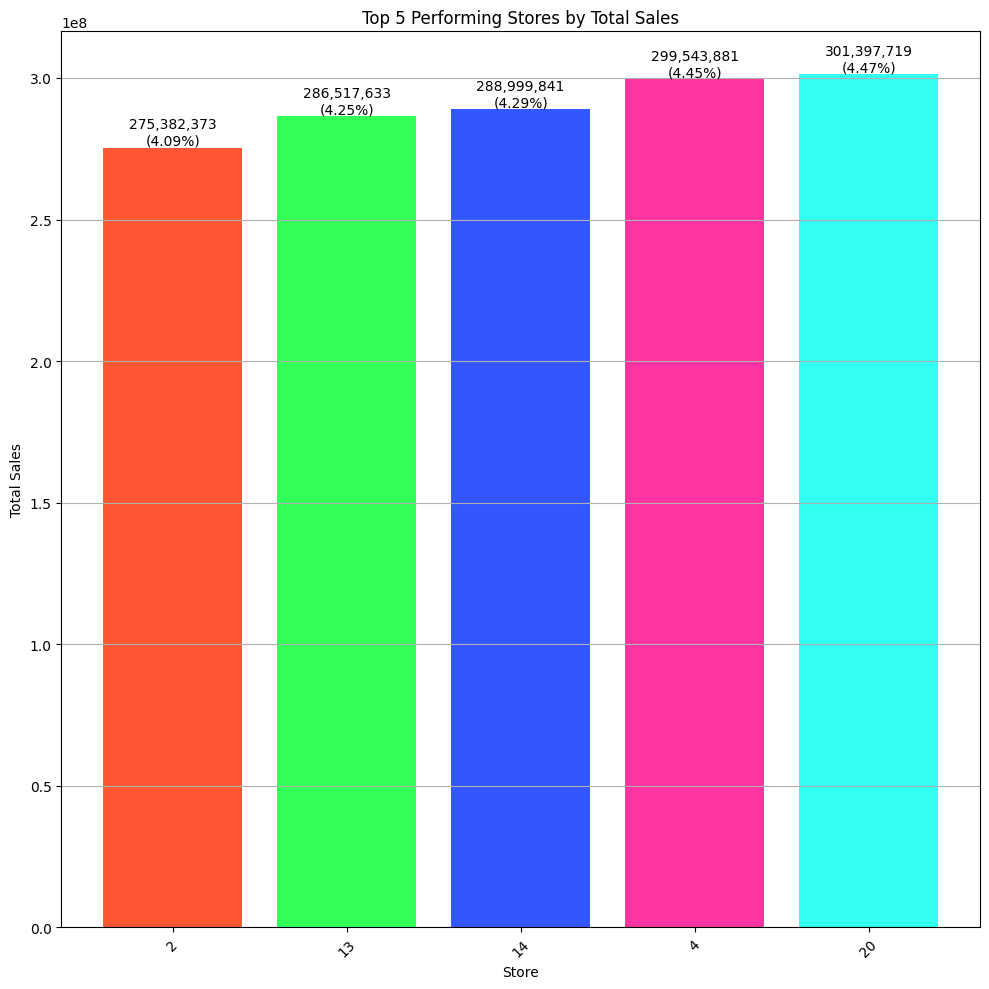

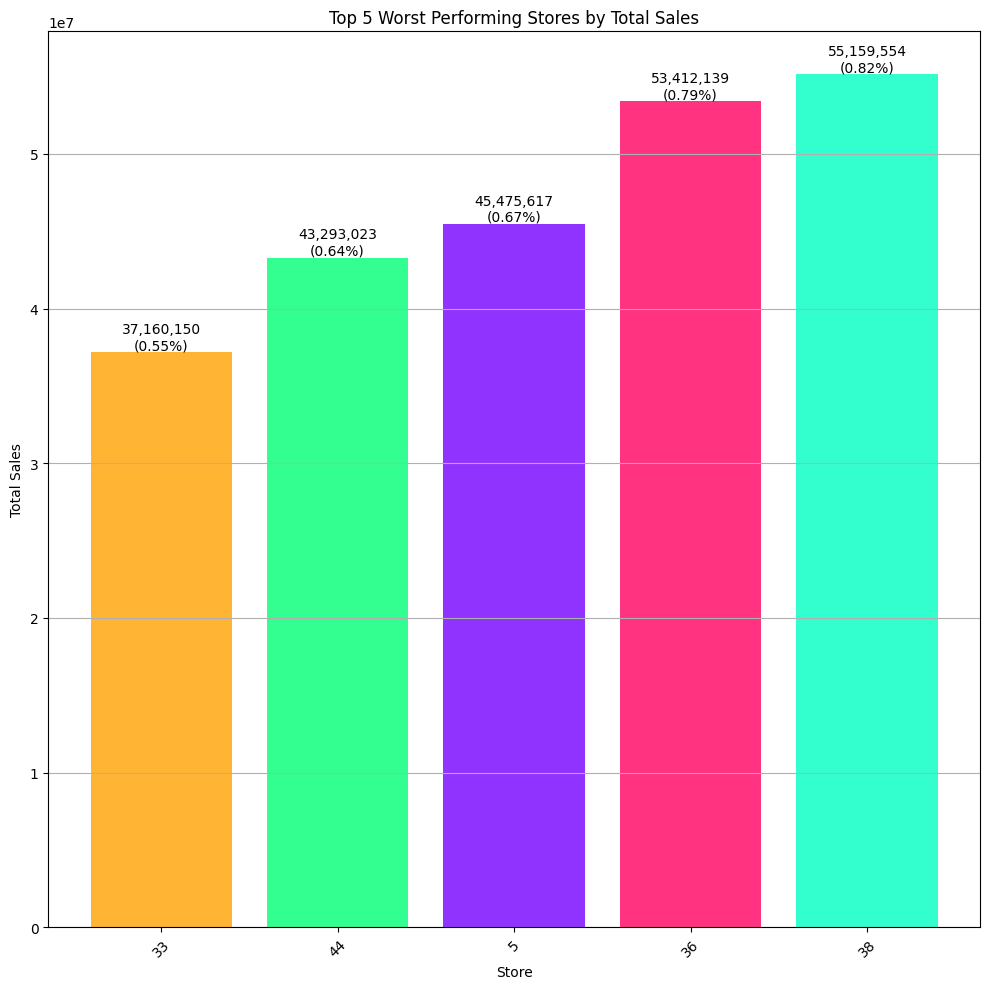

In [31]:

def store_sales_statistics(df):

    store_sales = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'sum']).reset_index()

    store_sales.columns = ['Store', 'Average_Sales', 'Total_Sales']

    store_sales['Total_Sales'] = store_sales['Total_Sales'].astype(float)


    store_sales = store_sales.sort_values(by='Total_Sales', ascending=False)


    total_sales = store_sales['Total_Sales'].sum()

    store_sales['Percentage_Contribution'] = (store_sales['Total_Sales'] / total_sales) * 100


    # store_sales_stats['Percentage_Contribution'] = store_sales_stats['Percentage_Contribution'].apply(lambda x: f"{x:.2f}%")

    return store_sales






FullData['Weekly_Sales'] = FullData['Weekly_Sales'].astype(int)


store_sales_stats = store_sales_statistics(FullData)




store_sales_stats['Average_Sales'] = store_sales_stats['Average_Sales'].round(2)
store_sales_stats['Total_Sales'] = store_sales_stats['Total_Sales'].round(2)
# store_sales_stats['Percentage_Contribution'] = store_sales_stats['Percentage_Contribution'].round(2)
# store_sales_stats['Percentage_Contribution'] = store_sales_stats['Percentage_Contribution'].round(2).apply(lambda x: f"{x:.2f}%")

store_sales_stats['Percentage_Contribution_Fmt'] = store_sales_stats['Percentage_Contribution'].round(2).map("{:.2f}%".format)






# print(store_sales_stats)



top_5_stores=store_sales_stats.head(5)
top_5_stores = top_5_stores.sort_values(by='Total_Sales', ascending=True)
print(top_5_stores)



bottom_5_stores=store_sales_stats.tail(5)
bottom_5_stores = bottom_5_stores.sort_values(by='Total_Sales', ascending=True)
print(bottom_5_stores)





colors_top = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF2']
colors_bottom = ['#FFB533', '#33FF91', '#9133FF', '#FF3380', '#33FFCE']

plt.figure(figsize=(10, 10))
bars = plt.bar(top_5_stores['Store'], top_5_stores['Total_Sales'], color=colors_top)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Top 5 Performing Stores by Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar, percentage in zip(bars, top_5_stores['Percentage_Contribution']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             '{:,}\n({:.2f}%)'.format(int(height), percentage), ha='center', va='bottom')
plt.tight_layout()
plt.show()






plt.figure(figsize=(10, 10))
bars = plt.bar(bottom_5_stores['Store'], bottom_5_stores['Total_Sales'], color=colors_bottom)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Top 5 Worst Performing Stores by Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')


# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height,
#              '{:,}'.format(int(height)), ha='center', va='bottom')




for bar, percentage in zip(bars, bottom_5_stores['Percentage_Contribution']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             '{:,}\n({:.2f}%)'.format(int(height), percentage), ha='center', va='bottom')

plt.tight_layout()
plt.show()









 ***` :With above Bar chart we can conclude that store number 2,13,14,4,20 are contributing  more to total sales with average 4.31 percentage
 and store number 33,44,5,36,38 are contributing less to total sales   with average 0.6961344  percentage`***

In [32]:
# Applying Time Series Mode

In [33]:
#  df=FullData
#   store_dataframes=pd.DataFrame ()

In [34]:
from statsmodels.tsa.stattools import adfuller

def separate_stores(df):


    grouped = df.groupby('Store')


    for store_id, group_data in grouped:

        group_data.reset_index(inplace=True)

        store_sales = group_data[['Date', 'Weekly_Sales']]

        store_sales.columns = ['Date', 'TotalSales']


        store_sales.index=store_sales['Date']

        del  store_sales['Date']


        globals()[f"S{store_id}Data"] = store_sales

        # print(globals()[f"S{store_id}Data"] )

        # globals()[f"S{store_id}Data"].index=S1Data['Date']




        result=adfuller(globals()[f"S{store_id}Data"]['TotalSales'])
        pval = result[1]

        pval_decimal = "{:.10f}".format(pval)
        # print(pval_decimal)

        if float(pval_decimal)<0.05:
             print('stationary',pval_decimal,f"S{store_id}Data")

        else:
             print('non_stationary',pval_decimal,f"S{store_id}Data")





separate_stores(FullData)






stationary 0.0000138777 S1Data
stationary 0.0000087631 S10Data
stationary 0.0033168390 S11Data
stationary 0.0000010452 S12Data
stationary 0.0000020565 S13Data
non_stationary 0.0678699657 S14Data
stationary 0.0000015100 S15Data
stationary 0.0001766058 S16Data
stationary 0.0000056792 S17Data
stationary 0.0060066269 S18Data
stationary 0.0000011615 S19Data
stationary 0.0039902062 S2Data
stationary 0.0000034913 S20Data
stationary 0.0000021594 S21Data
stationary 0.0000000809 S22Data
stationary 0.0000001773 S23Data
stationary 0.0000082816 S24Data
stationary 0.0000016841 S25Data
stationary 0.0000349161 S26Data
stationary 0.0000068212 S27Data
stationary 0.0397090223 S28Data
stationary 0.0000004691 S29Data
stationary 0.0384094979 S3Data
non_stationary 0.1683666804 S30Data
stationary 0.0003060423 S31Data
stationary 0.0000117404 S32Data
stationary 0.0008378720 S33Data
stationary 0.0000633865 S34Data
stationary 0.0042337078 S35Data
non_stationary 0.9730160100 S36Data
stationary 0.0130103611 S37Data

In [35]:
Stores = {
    "Store14": S14Data,
    "Store4": S4Data,
    "Store20": S20Data,
    "Store33": S33Data,
    "Store44": S44Data,
    "Store5": S5Data
}


## ***  As trend is clearly  visible  in Seasonal Decomposition I will De-Trend Data   ***

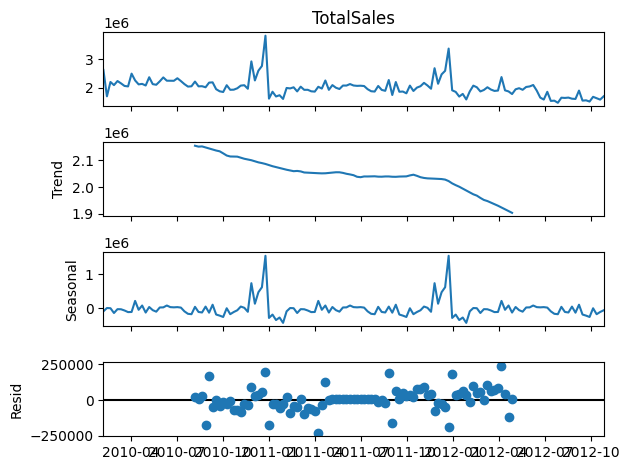

Seasonally adjusted data is not stationary --- 0.6638033438


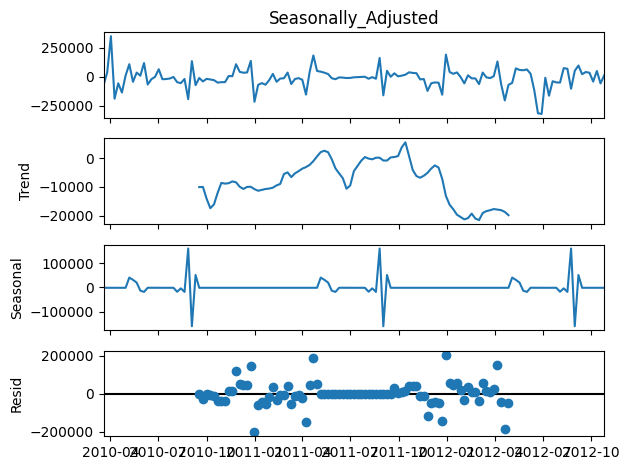

Detrended data is stationary --- 0.0000000000


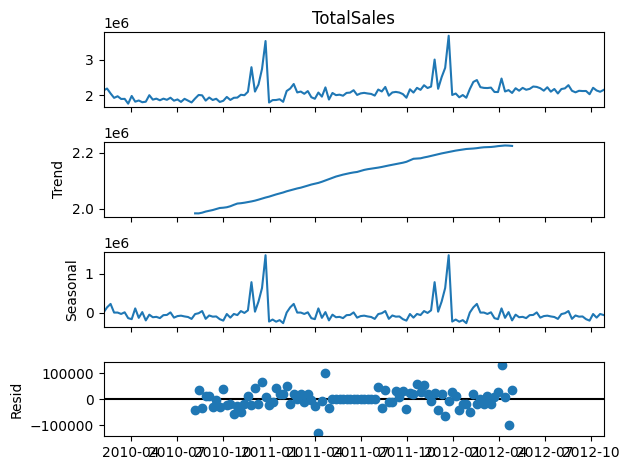

Seasonally adjusted data is not stationary --- 0.5780594786


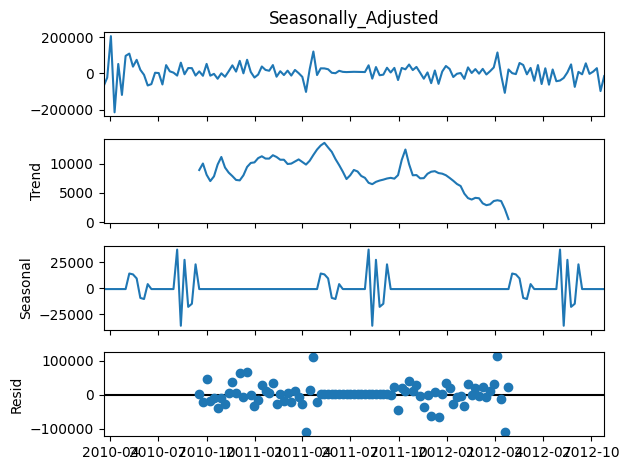

Detrended data is stationary --- 0.0000000000


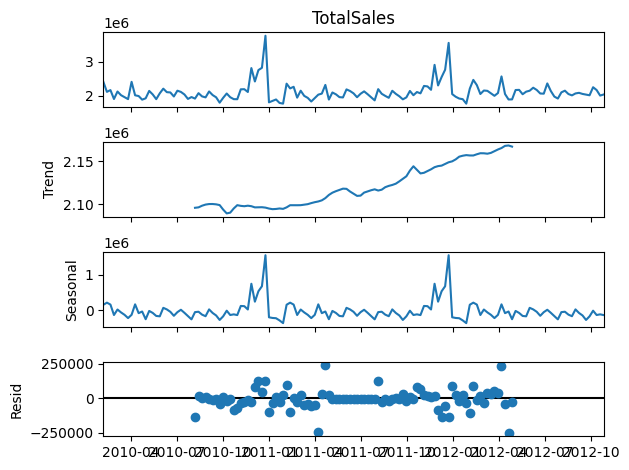

Seasonally adjusted data is not stationary --- 0.7281869647


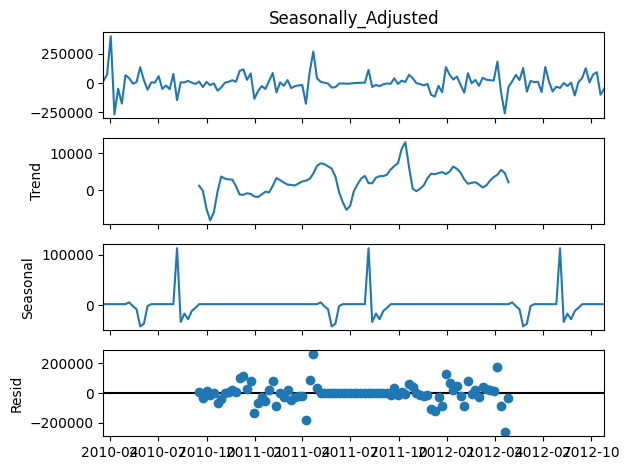

Detrended data is stationary --- 0.0000000001


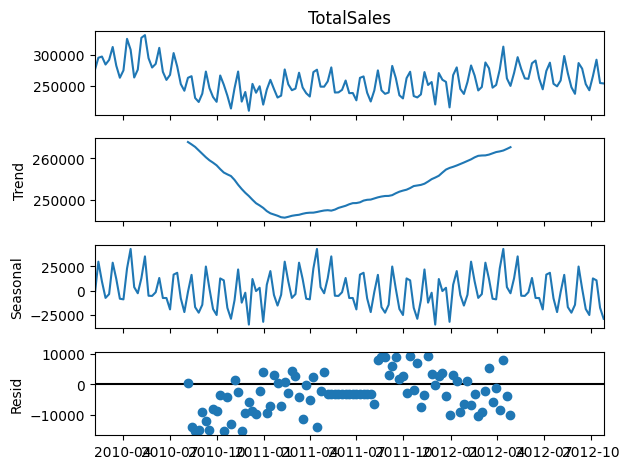

Seasonally adjusted data is not stationary --- 0.1282927985


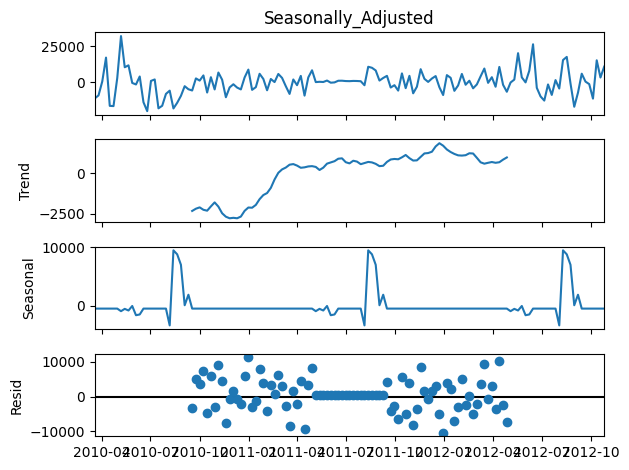

Detrended data is not stationary --- 0.0762588667


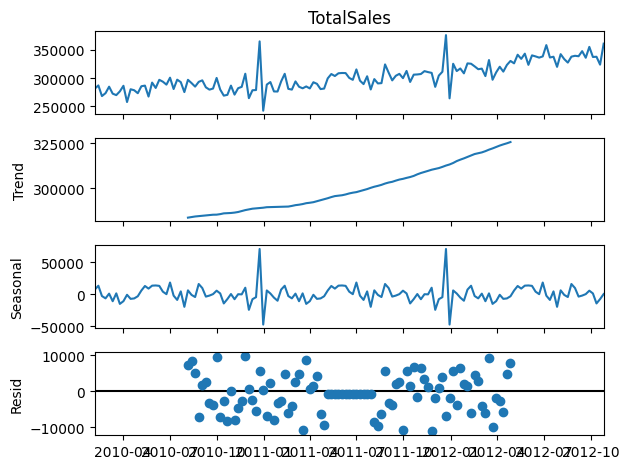

Seasonally adjusted data is not stationary --- 0.9910405308


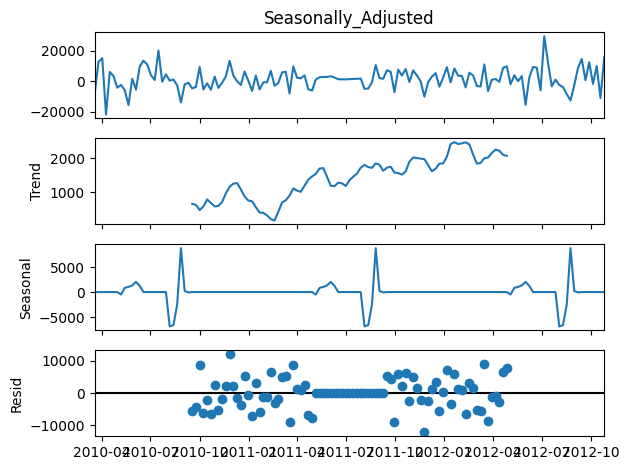

Detrended data is stationary --- 0.0000000293


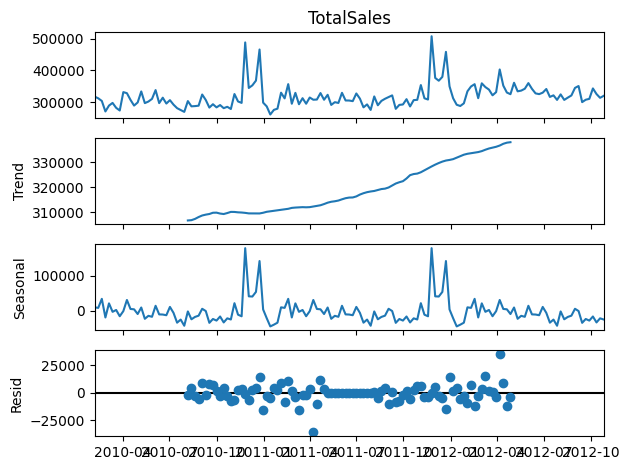

Seasonally adjusted data is not stationary --- 0.3460002123


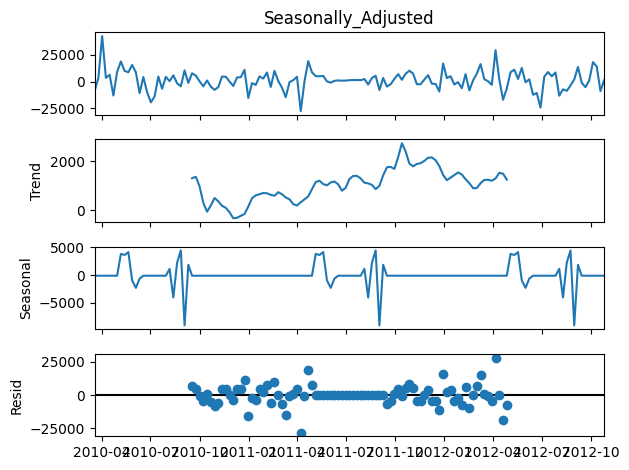

Detrended data is stationary --- 0.0000141791


In [36]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, HTML
import matplotlib.pyplot as plt



for var_name, data in Stores.items():
    globals()[var_name] = data.copy()
    isnotstationary = False


    result = adfuller(data['TotalSales'])
    pval = result[1]
    pval_decimal = "{:.10f}".format(pval)

    if float(pval_decimal) < 0.05:
        res = f'stationary --- {pval_decimal}'
    else:
        res = f'Not-stationary --- {pval_decimal}'
        isnotstationary = True

    heading_html = f'<h2 style="color:white; background-color:blue;"><b>Seasonal Decomposition of {var_name} </b></h2>'
    display(HTML(heading_html))

    Data_clean = data.dropna()

    #   seasonal decomposition
    decompose_result = seasonal_decompose(Data_clean['TotalSales'], model='additive', period=52)

    # Plot the decomposition results
    decompose_result.plot()
    plt.show()

    # Remove the seasonal component
    Data_clean['Seasonally_Adjusted'] = Data_clean['TotalSales'] - decompose_result.seasonal.dropna()


    result = adfuller(Data_clean['Seasonally_Adjusted'])
    pval = result[1]
    pval_decimal = "{:.10f}".format(pval)

    if float(pval_decimal) < 0.05:
        print(f'Seasonally adjusted data is stationary --- {pval_decimal}')
    else:
        print(f'Seasonally adjusted data is not stationary --- {pval_decimal}')



    #  Rolling mean detrending
    rolling = Data_clean['Seasonally_Adjusted'].rolling(window=7).mean()

    Data_clean_DT = Data_clean['Seasonally_Adjusted'] - rolling



    data['Seasonally_Adjusted'] = Data_clean['Seasonally_Adjusted'] - rolling

    Data_clean_DT = Data_clean_DT.dropna()


    # data['Original_TotalSales'] = Data_clean['TotalSales']

    #  seasonal decomposition on detrended data
    decompose_result = seasonal_decompose(Data_clean_DT, model='additive', period=52)

    # Plot
    decompose_result.plot()
    plt.show()

    # Test for stationarity   agaiin
    result = adfuller(Data_clean_DT)
    pval = result[1]
    pval_decimal = "{:.10f}".format(pval)

    if float(pval_decimal) < 0.05:
        print(f'Detrended data is stationary --- {pval_decimal}')
    else:
        print(f'Detrended data is not stationary --- {pval_decimal}')








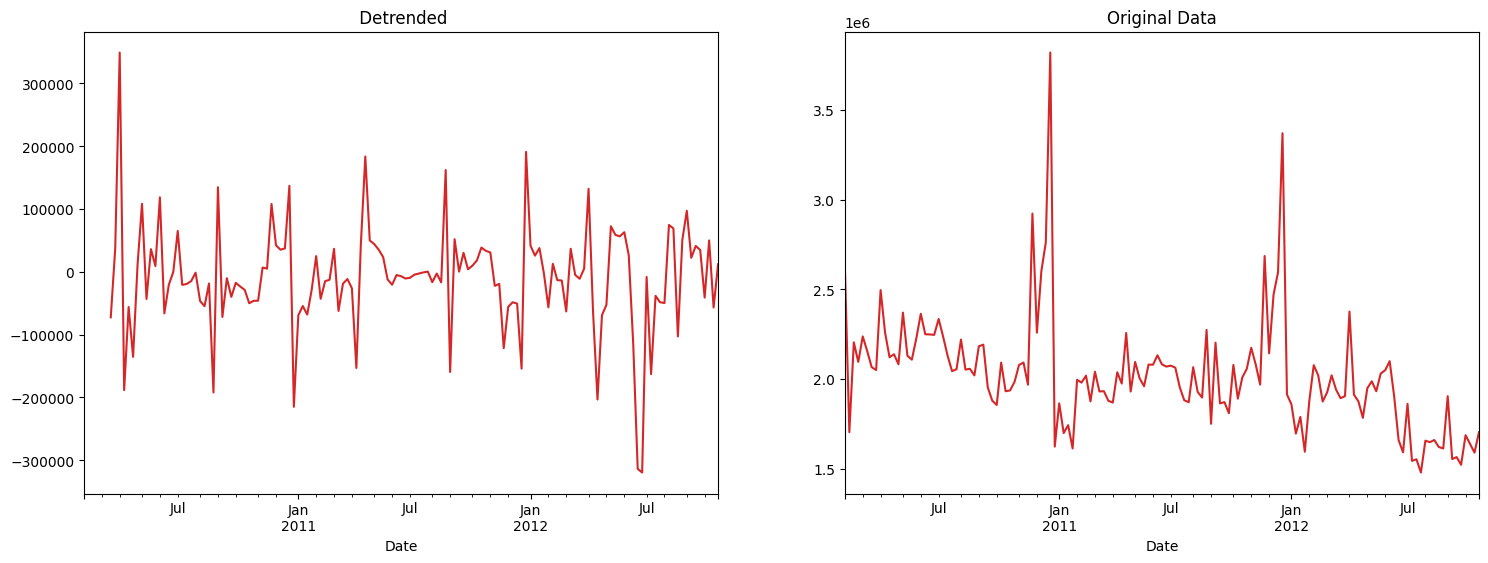

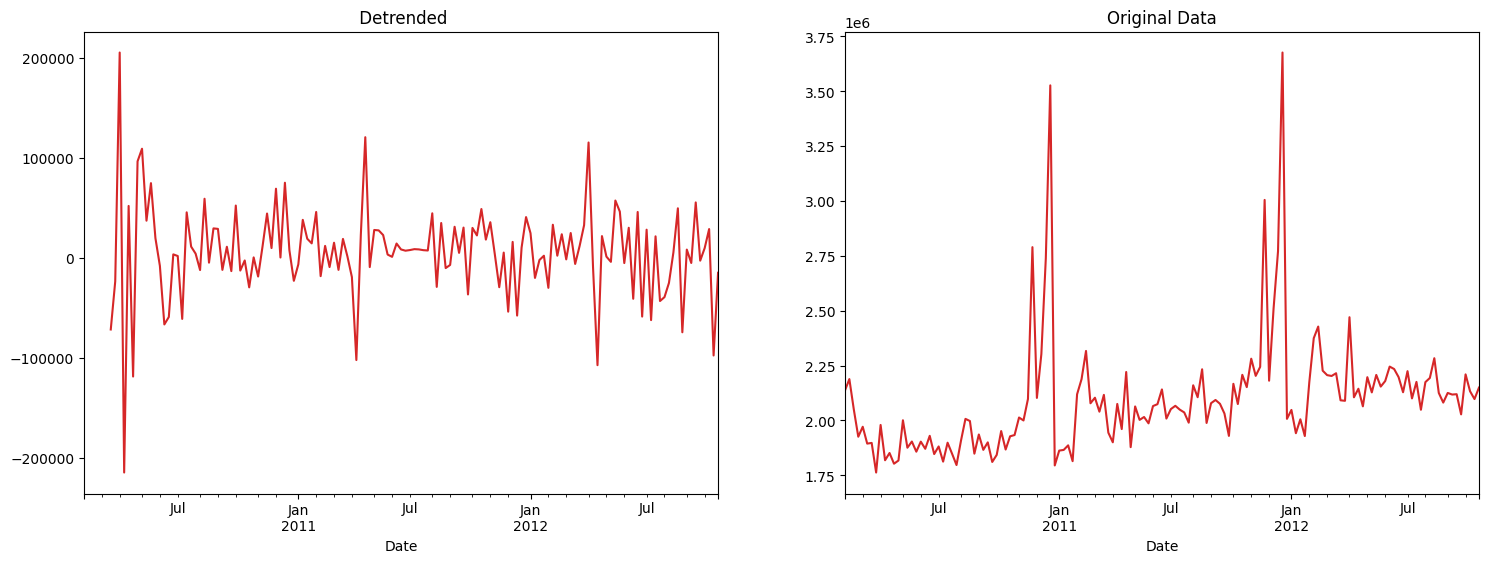

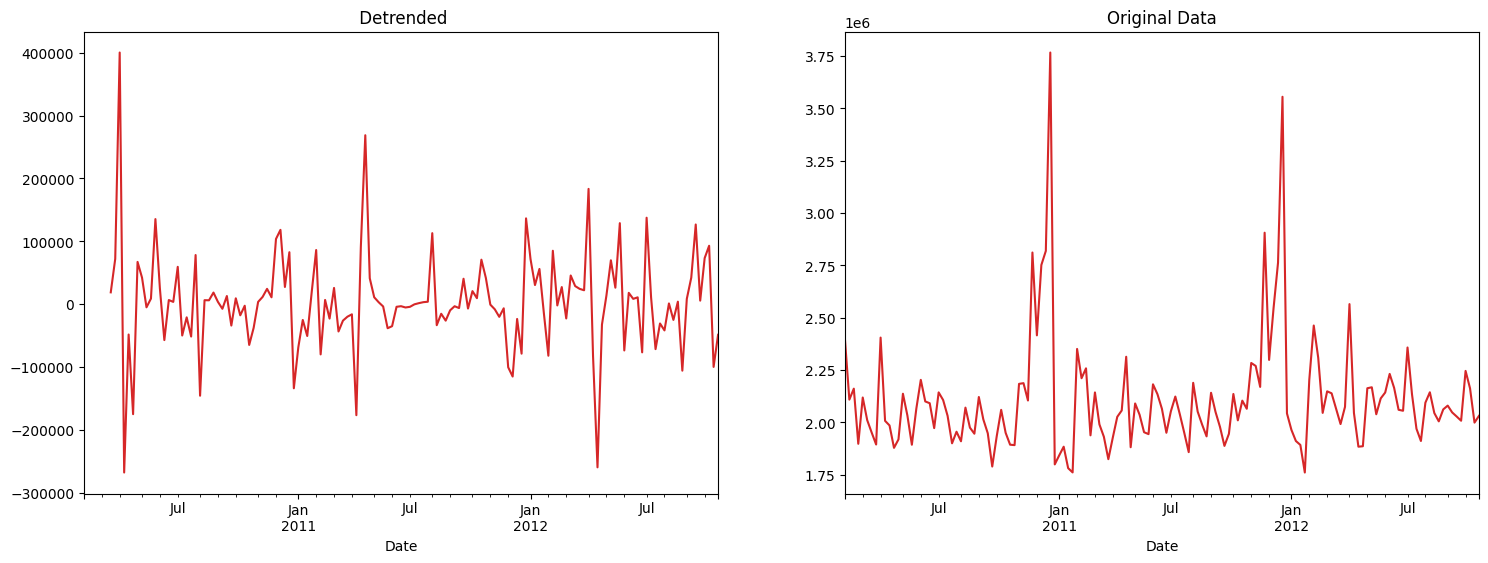

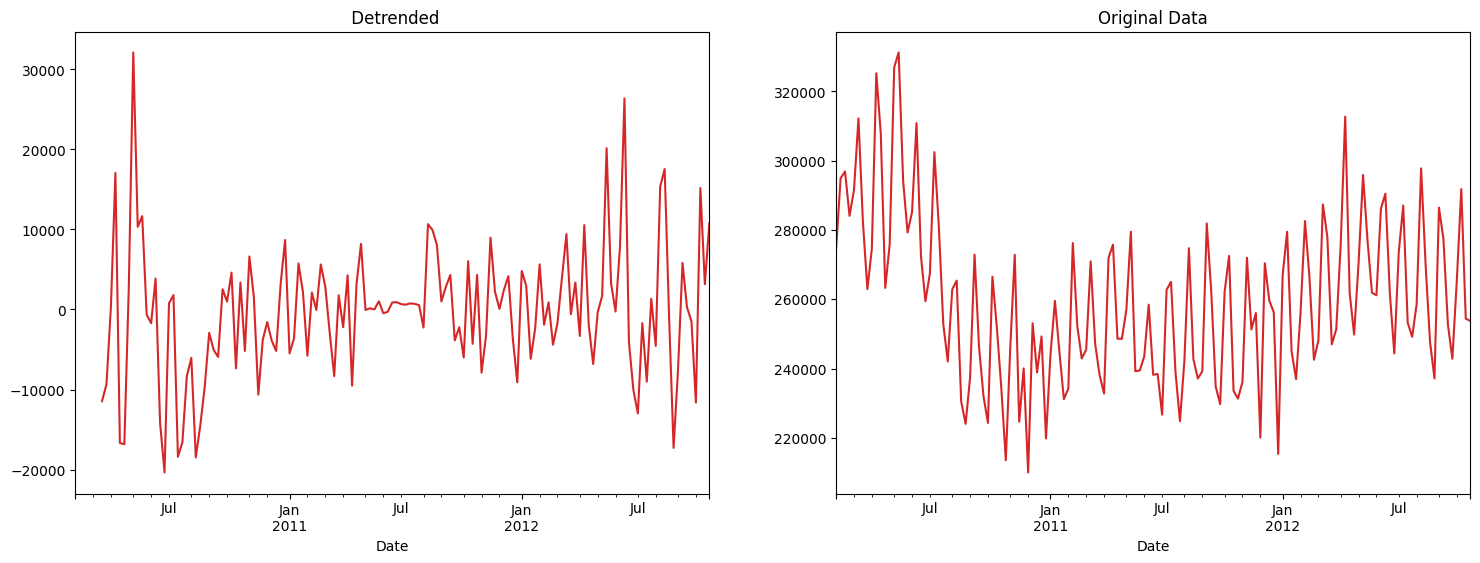

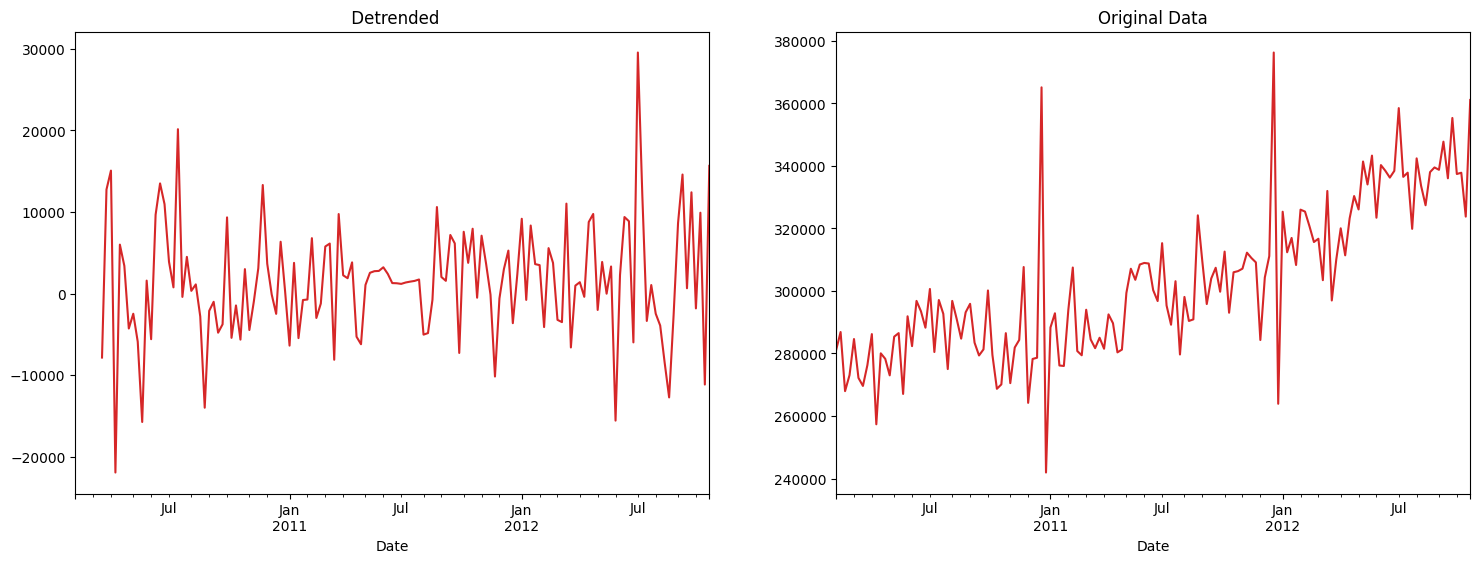

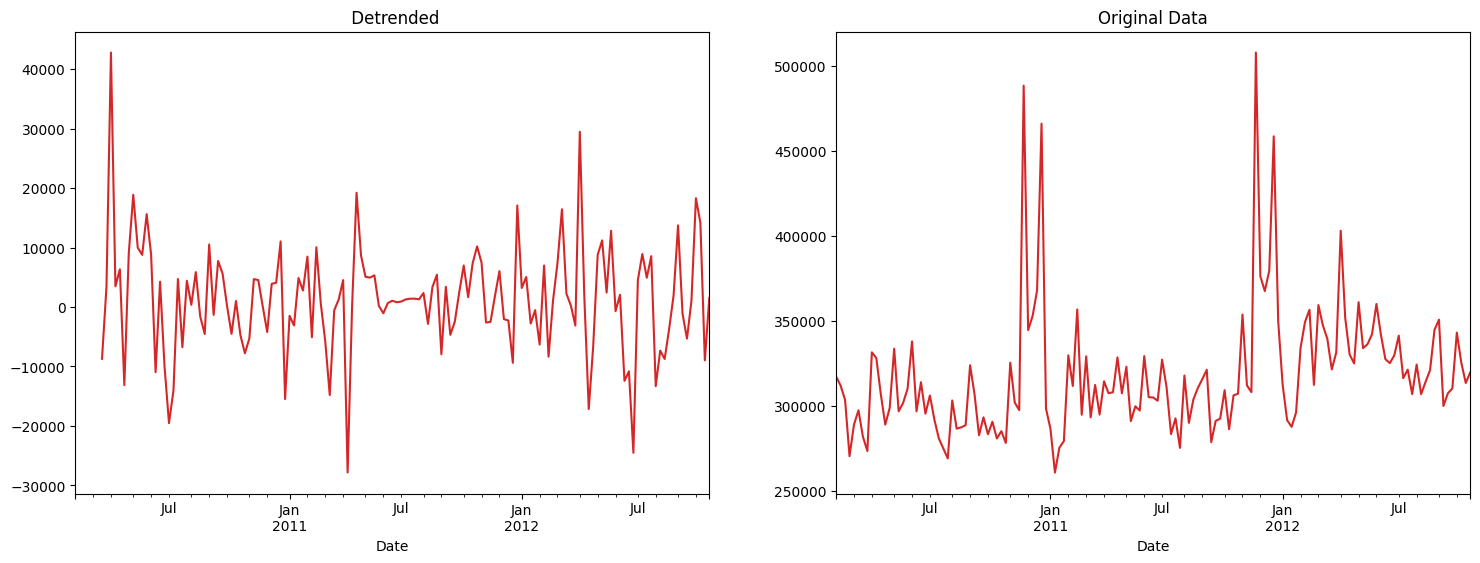

In [37]:



for key, value in Stores.items():


  heading_html = f'<h2 style="color:white; background-color:blue;"><b>Data of {key} </b></h2>'
  display(HTML(heading_html))


  ax1=plt.subplot(1,2,2)
  value["TotalSales"].plot(figsize=(18,6),color="tab:red",title="Original Data",ax=ax1)

  ax2=plt.subplot(1,2,1)

  value['Seasonally_Adjusted'].plot(figsize=(18,6),color='tab:red',title=" Detrended",ax=ax2)

  plt.show()


In [38]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 28189579297.250755


<ipython-input-39-67447581ba76>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.loc[test.index, 'Predictions'] = predictions


Forecasted Sales for Next 52 Weeks: 2012-11-02      9406.335165
2012-11-09    -43790.861951
2012-11-16    -40677.553571
2012-11-23   -143004.945742
2012-11-30    -77276.039148
2012-12-07    -69910.963599
2012-12-14    -72013.976648
2012-12-21   -175586.119505
2012-12-28    169576.352335
2013-01-04     20234.583791
2013-01-11      4302.549451
2013-01-18     16361.852335
2013-01-25    -24087.403159
2013-02-01    -77964.156593
2013-02-08     -8725.133242
2013-02-15    -34711.312500
2013-02-22    -35306.629808
2013-03-01    -84525.588599
2013-03-08     15228.154533
2013-03-15    -26318.155907
2013-03-22    -32511.872940
2013-03-29    -16555.296703
2013-04-05    110711.622253
2013-04-12    -84747.026099
2013-04-19   -224794.114011
2013-04-26    -90573.627747
2013-05-03    -73857.182692
2013-05-10     51091.827610
2013-05-17     37445.756868
2013-05-24     35039.323489
2013-05-31     41657.211538
2013-06-07      4947.848214
2013-06-14   -136164.155220
2013-06-21   -335174.695055
2013-06-28  

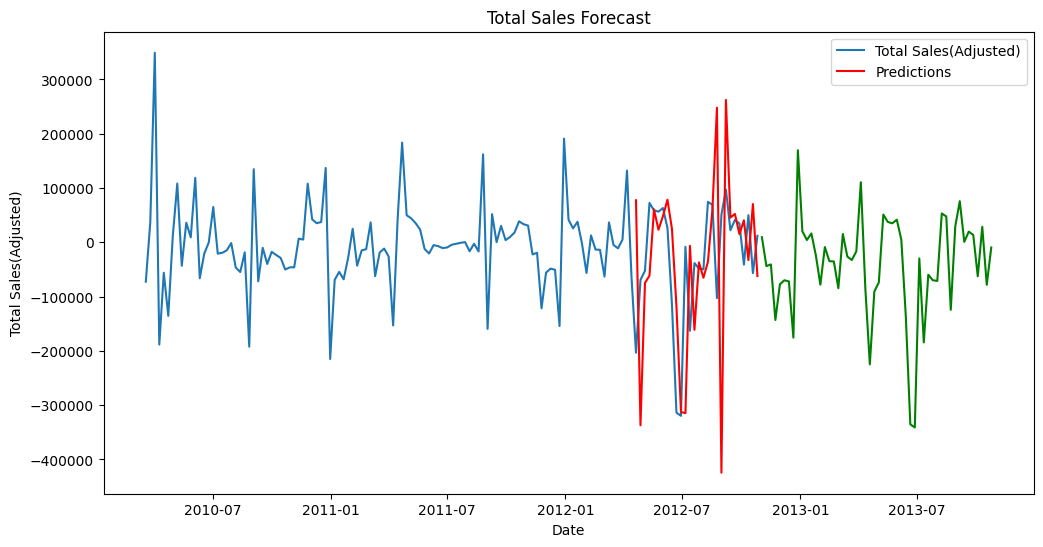

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 8675923663.531345


<ipython-input-39-67447581ba76>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.loc[test.index, 'Predictions'] = predictions


Forecasted Sales for Next 52 Weeks: 2012-11-02      2729.199176
2012-11-09    -29172.142170
2012-11-16    -62250.029533
2012-11-23    -27657.426511
2012-11-30    -86703.330357
2012-12-07    -16971.385989
2012-12-14    -90618.519231
2012-12-21    -22700.642857
2012-12-28      7849.971154
2013-01-04     -8282.410027
2013-01-11    -52996.820055
2013-01-18    -35074.316621
2013-01-25    -30795.244505
2013-02-01    -62888.762363
2013-02-08       186.582418
2013-02-15    -30781.983516
2013-02-22     -9301.693681
2013-03-01    -34460.548764
2013-03-08     -8113.675824
2013-03-15    -39022.179945
2013-03-22    -20955.131181
2013-03-29      -202.346154
2013-04-05     82406.282967
2013-04-12    -42329.111951
2013-04-19   -140199.854396
2013-04-26    -11182.070055
2013-05-03    -31685.946429
2013-05-10    -36907.186813
2013-05-17     24397.120192
2013-05-24     13328.912088
2013-05-31    -38124.124313
2013-06-07     -2847.124313
2013-06-14    -73818.585165
2013-06-21     12950.403846
2013-06-28  

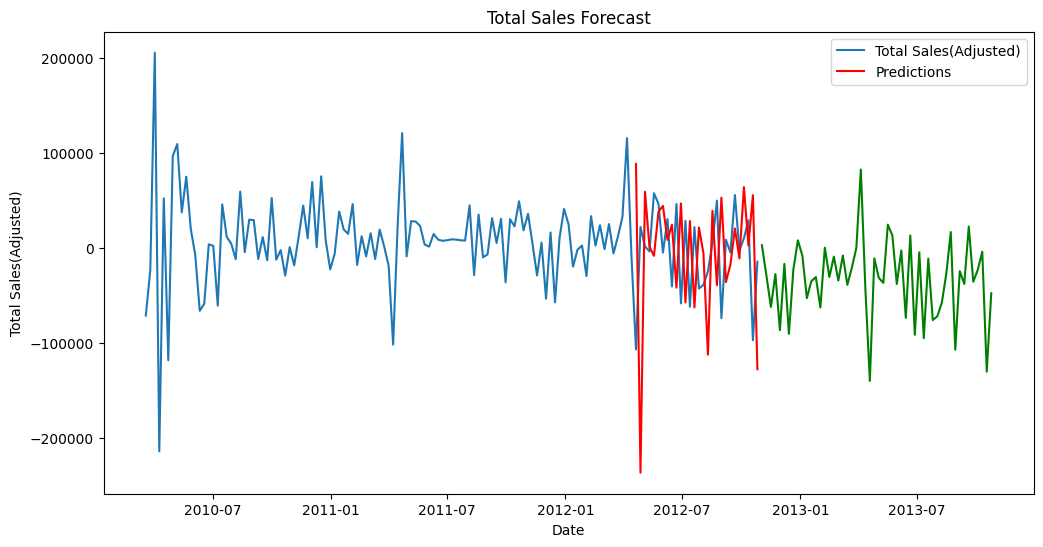

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 23203568482.69752


<ipython-input-39-67447581ba76>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.loc[test.index, 'Predictions'] = predictions


Forecasted Sales for Next 52 Weeks: 2012-11-02    -91133.377747
2012-11-09    -98541.909341
2012-11-16   -110536.689560
2012-11-23    -96979.819368
2012-11-30   -190801.098901
2012-12-07   -205542.097527
2012-12-14   -113933.569368
2012-12-21   -169137.269231
2012-12-28     46134.337225
2013-01-04    -18594.368819
2013-01-11    -59977.164835
2013-01-18    -34321.570742
2013-01-25   -105350.625687
2013-02-01   -172422.195742
2013-02-08     -5407.163462
2013-02-15    -92379.676511
2013-02-22    -63157.800824
2013-03-01   -113114.353022
2013-03-08    -44765.742445
2013-03-15    -61612.143544
2013-03-22    -66022.147665
2013-03-29    -68275.302198
2013-04-05     93039.883242
2013-04-12   -172652.872253
2013-04-19   -350014.600962
2013-04-26   -122903.078297
2013-05-03    -76588.067308
2013-05-10    -20607.085165
2013-05-17    -64162.169643
2013-05-24     38510.190247
2013-05-31   -164037.402473
2013-06-07    -72364.542582
2013-06-14    -81956.068681
2013-06-21    -79503.385989
2013-06-28  

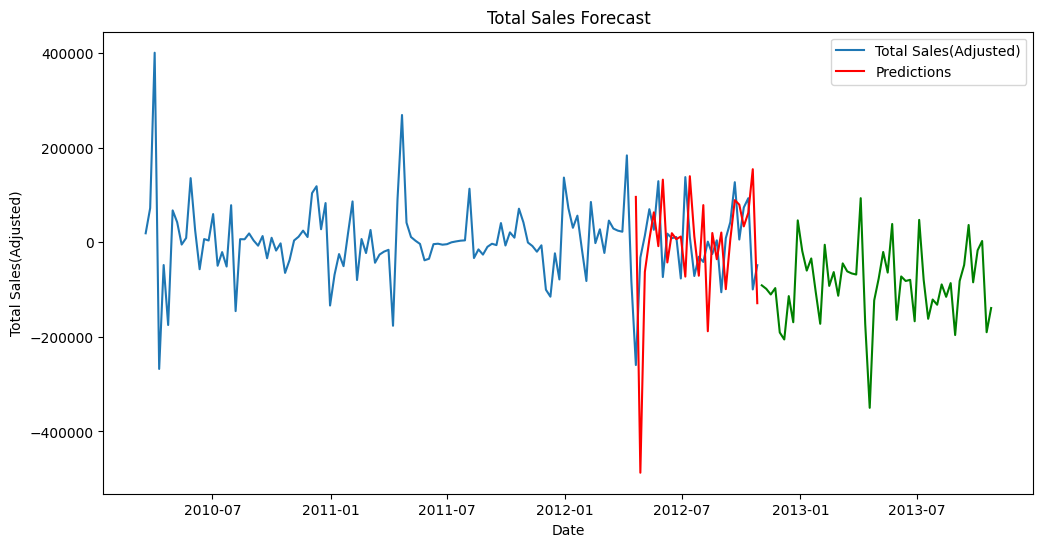

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 148379902.35932925


<ipython-input-39-67447581ba76>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.loc[test.index, 'Predictions'] = predictions


Forecasted Sales for Next 52 Weeks: 2012-11-02    -1471.552198
2012-11-09     3154.807692
2012-11-16    15387.026786
2012-11-23     8646.708791
2012-11-30     6496.361264
2012-12-07     8864.716346
2012-12-14    10585.750000
2012-12-21     2760.710165
2012-12-28    -2672.539148
2013-01-04    11235.072115
2013-01-11     9365.853709
2013-01-18      260.548077
2013-01-25     4029.948489
2013-02-01    12058.238324
2013-02-08     4513.917582
2013-02-15     7315.192995
2013-02-22     2025.366758
2013-03-01     4729.339973
2013-03-08    10383.230769
2013-03-15    15841.698489
2013-03-22     5841.519918
2013-03-29     9783.167582
2013-04-05     3119.486951
2013-04-12    16964.729396
2013-04-19     4455.978709
2013-04-26     -382.151099
2013-05-03     6072.113324
2013-05-10     8120.056319
2013-05-17    26566.063874
2013-05-24     9677.102335
2013-05-31     6162.035714
2013-06-07    14308.280907
2013-06-14    32788.850275
2013-06-21     2378.454670
2013-06-28    -3635.524725
2013-07-05    -6553

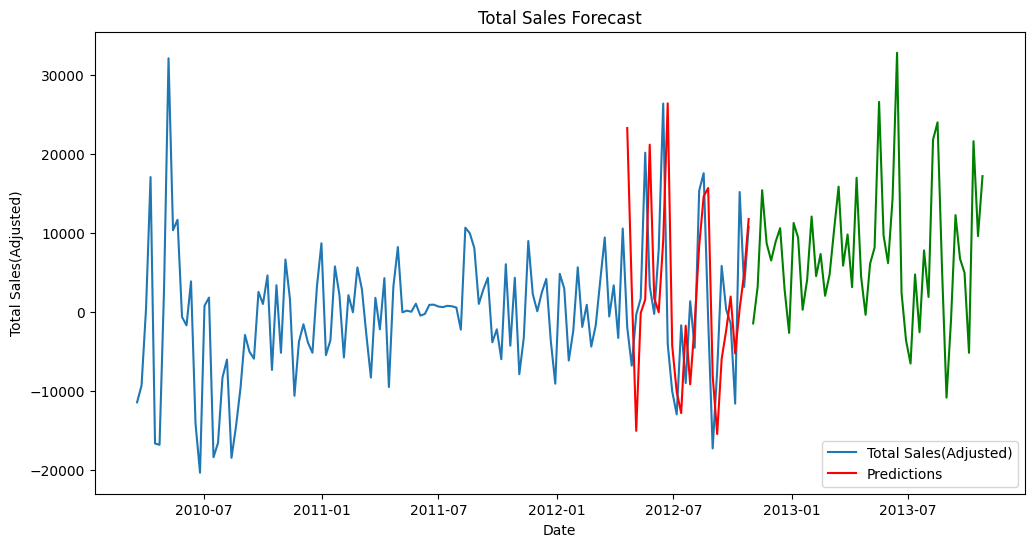

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 291196246.0466472


<ipython-input-39-67447581ba76>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.loc[test.index, 'Predictions'] = predictions


Forecasted Sales for Next 52 Weeks: 2012-11-02    23242.588599
2012-11-09    19846.805632
2012-11-16    16011.572115
2012-11-23     5987.465659
2012-11-30    15555.828984
2012-12-07    19149.168956
2012-12-14    21415.074863
2012-12-21    12523.332418
2012-12-28    18484.241758
2013-01-04    25317.258929
2013-01-11    15376.964973
2013-01-18    24489.961538
2013-01-25    19760.195742
2013-02-01    19637.842720
2013-02-08    12046.568681
2013-02-15    21722.210165
2013-02-22    19911.722527
2013-03-01    12930.938187
2013-03-08    12654.817995
2013-03-15    27172.001374
2013-03-22     9548.338599
2013-03-29    17124.125687
2013-04-05    17545.731456
2013-04-12    15752.782280
2013-04-19    24916.532280
2013-04-26    25904.919643
2013-05-03    14145.849588
2013-05-10    20023.621566
2013-05-17    16137.967033
2013-05-24    19469.438187
2013-05-31      585.817308
2013-06-07    18414.523352
2013-06-14    25529.208791
2013-06-21    25013.458791
2013-06-28    10170.457418
2013-07-05    45685

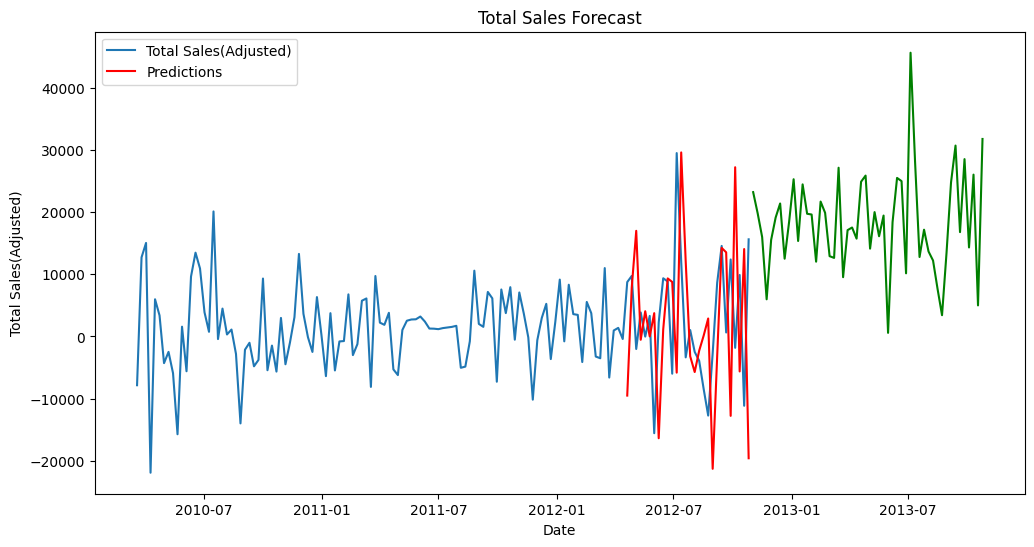

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 223577897.19752163


<ipython-input-39-67447581ba76>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.loc[test.index, 'Predictions'] = predictions


Forecasted Sales for Next 52 Weeks: 2012-11-02    -1256.987637
2012-11-09   -11301.649038
2012-11-16   -11187.457418
2012-11-23    -6808.269918
2012-11-30    -2647.274725
2012-12-07   -10725.414835
2012-12-14   -10955.642170
2012-12-21   -18071.834478
2012-12-28     8391.512363
2013-01-04    -5483.197115
2013-01-11    -3635.674451
2013-01-18   -11468.634615
2013-01-25    -9216.284341
2013-02-01   -15009.538462
2013-02-08    -1703.010989
2013-02-15   -17034.205357
2013-02-22    -7602.910714
2013-03-01    -1287.986264
2013-03-08     7756.220467
2013-03-15    -6442.804945
2013-03-22    -8450.008242
2013-03-29   -11805.986951
2013-04-05    20786.778159
2013-04-12    -6789.521291
2013-04-19   -25844.528159
2013-04-26   -15252.255495
2013-05-03       87.426511
2013-05-10     2524.357143
2013-05-17    -6260.717720
2013-05-24     4129.857830
2013-05-31    -9382.834478
2013-06-07    -6640.955357
2013-06-14   -21106.780220
2013-06-21   -19509.413462
2013-06-28   -33219.829670
2013-07-05    -4136

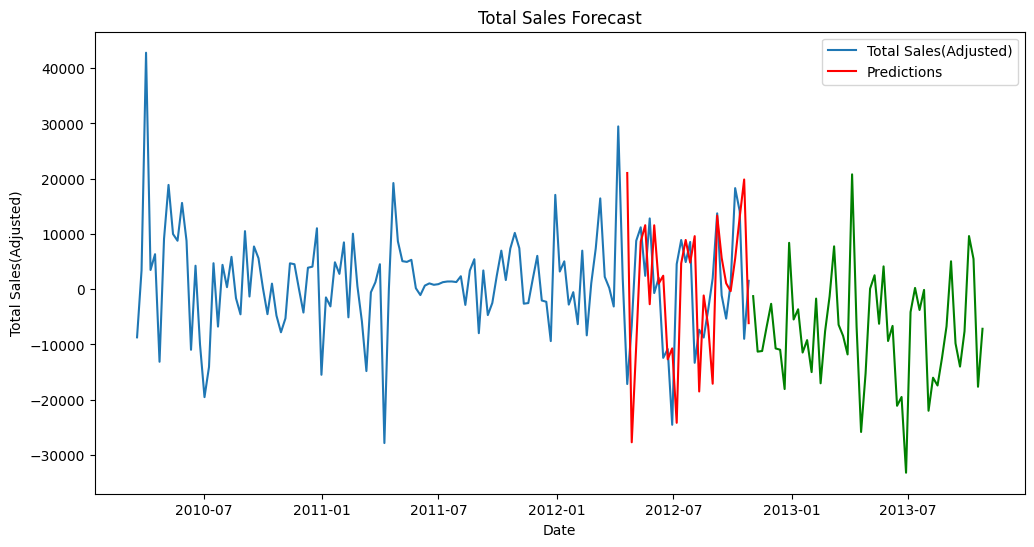

In [39]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error




for key, value in Stores.items():

  value=value.dropna()
  # print(value)

  # value=value-value.shift()



  # value['Seasonally_Adjusted'] = value['Seasonally_Adjusted'].diff().dropna()





# Assuming S1Data is already loaded and indexed by 'Date'

# Split the data into train and test sets
  train_size = int(len(value) * 0.8)  # 80% train, 20% test
  train, test = value.iloc[:train_size], value.iloc[train_size:]





# Train the SARIMA model on the training set
# model = SARIMAX(train['Seasonally_Adjusted'], order=(2,0,3), seasonal_order=(2,0,3,52))


  model = SARIMAX (value['Seasonally_Adjusted'].dropna(), order=(0,1,0), seasonal_order=(0, 1, 0, 52))
  model_fit = model.fit()

# model_fit = model.fit(disp=False)








# Make predictions on   test
  start = len(train)
  end = len(train) + len(test) - 1
  predictions = model_fit.predict(start=start, end=end, typ='levels')

# Adding the predictions
  value.loc[test.index, 'Predictions'] = predictions

# Evaluate the model
  mse = mean_squared_error(test['Seasonally_Adjusted'], predictions)
  print('Mean Squared Error:', mse)



  display(HTML(f'<h2>Forecasted Sales for Next 52 Weeks </h2>'))

# Forecasting
  future_forecast = model_fit.forecast(steps=52)
  print('Forecasted Sales for Next 52 Weeks:', future_forecast)
  # future_forecast=pd.DataFrame(future_forecast)

  #
  # display(HTML(future_forecast.to_html(index=False, justify='center', classes='table table-striped table-bordered table-hover')))


# Plot the results
  plt.figure(figsize=(12, 6))
  plt.plot(value.index, value['Seasonally_Adjusted'], label='Total Sales(Adjusted)')
  plt.plot(value.index, value['Predictions'], label='Predictions', color='red')
  plt.plot(future_forecast ,color='green')

  plt.title('Total Sales Forecast')
  plt.xlabel('Date')
  plt.ylabel('Total Sales(Adjusted)')
  plt.legend()
  plt.show()


# ***  Project Report: Forecasting Total Sales

**Introduction:**


This report outlines the process and findings of forecasting total sales using SARIMA (Seasonal AutoRegressive Integrated Moving Average) modeling technique. The aim is to provide accurate predictions for total sales over the next 52 weeks.





**Methodology:**


The forecasting process involves the following steps:

Data Preprocessing:

The provided dataset is loaded and processed.

Null values are dropped from the dataset .

The dataset is split into training and testing sets, with an 80-20 split.




**Model Training:**


SARIMA model is utilized for time series forecasting.
The SARIMA model is fitted on the training data.
SARIMA parameters are chosen as order=(0,1,0) and seasonal_order=(0,1,0,52).



**Model Evaluation:**  

Mean Squared Error (MSE) is used as the evaluation metric.
MSE is calculated between the actual test data and predicted values.


**Forecasting:**

Predictions are made for the test data.
Future sales for the next 52 weeks are forecasted.



**Results:**

The SARIMA model demonstrated promising results in forecasting total sales. The mean squared error (MSE) between actual and predicted values serves as an indicator of model accuracy. Additionally, future sales for the next 52 weeks have been forecasted based on the trained model.



Conclusion:
In conclusion, the SARIMA model shows potential for accurately forecasting total sales. Further refinement and optimization of the model parameters could potentially improve its predictive performance. These forecasts can be valuable for informing business strategies and decision-making processes.

